In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def sigmoid_activation(x):
    return 1.0/(1+np.exp(-x))

In [3]:
def sigmoid_deriv(x):
    
    return x * (1-x)

In [4]:
def predict(X, W):
    
    preds = sigmoid_activation(X.dot(W))
    
    preds[preds<=0.5] = 0
    preds[preds>0.5] = 1
    
    return preds

In [5]:
#generating a 2-class classification problem with 1000 data points where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples = 1000, n_features = 2, centers = 2, cluster_std = 1.5, random_state = 1)
y = y.reshape((y.shape[0], 1))

In [6]:
#inserting a column of 1's as the last entry in the feature matrix
#this allows us to treat the bias as a trainable parameter within weight matrix
X = np.c_[X, np.ones((X.shape[0]))]

In [7]:
#splitting thedata into training and testing set
(trainX, testX, trainY, testY) = train_test_split(X, y, test_size = 0.5, random_state = 42)

In [8]:
#initializing the weight matrix and list of losses
W = np.random.randn(X.shape[1], 1)
losses = []

In [10]:
# if no of epochs is 100
for epoch in range(0, 100):
    preds = sigmoid_activation(trainX.dot(W)) #our prediction
    error = preds - trainY                    #error in prediction
    loss = np.sum(error ** 2)                 # our loss
    losses.append(loss)                       # appending losses list for plotting
    d = error * sigmoid_deriv(preds)          
    gradient = trainX.T.dot(d)                #gradient descent update
    
    W += -0.01 * gradient            # updated weights
    
    #check to see if the update should be displayed
    if epoch == 0 or (epoch + 1) % 5 == 0:
        print('[INFO] epoch = {}, loss = {:.7f}'.format(int(epoch + 1), loss))

[INFO] epoch = 1, loss = 30.9984540
[INFO] epoch = 5, loss = 6.0463725
[INFO] epoch = 10, loss = 2.8446098
[INFO] epoch = 15, loss = 1.5772130
[INFO] epoch = 20, loss = 1.0838842
[INFO] epoch = 25, loss = 0.8467082
[INFO] epoch = 30, loss = 0.7105480
[INFO] epoch = 35, loss = 0.6236540
[INFO] epoch = 40, loss = 0.5650568
[INFO] epoch = 45, loss = 0.5245212
[INFO] epoch = 50, loss = 0.4960148
[INFO] epoch = 55, loss = 0.4754164
[INFO] epoch = 60, loss = 0.4597907
[INFO] epoch = 65, loss = 0.4471565
[INFO] epoch = 70, loss = 0.4362958
[INFO] epoch = 75, loss = 0.4265230
[INFO] epoch = 80, loss = 0.4174742
[INFO] epoch = 85, loss = 0.4089595
[INFO] epoch = 90, loss = 0.4008771
[INFO] epoch = 95, loss = 0.3931675
[INFO] epoch = 100, loss = 0.3857922


In [11]:
#evaluating model

preds = predict (testX, W)
print(classification_report(testY, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



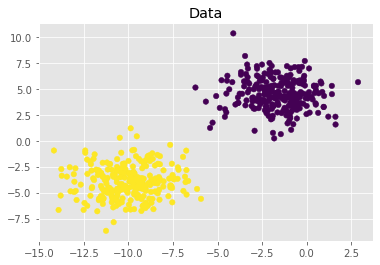

In [12]:
plt.style.use('ggplot')
plt.figure()
plt.title('Data')
plt.scatter(testX[:, 0], testX[:, 1], marker = 'o', c = testY[:, 0], s = 30)

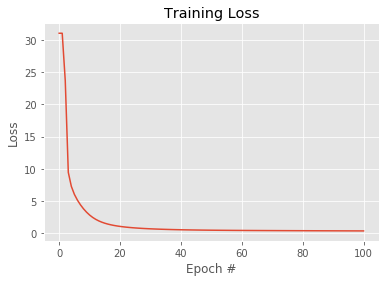

In [16]:
plt.style.use('ggplot')
plt.figure()
plt.plot(np.arange(0, 101), losses)
plt.title('Training Loss')
plt.xlabel('Epoch #')
plt.ylabel('Loss')
plt.show()